In [2]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True,transform=transform)
mnist_test  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data = torch.stack([mnist_train[i][0] for i in range(len(mnist_train))])
test_data  = torch.stack([mnist_test[i][0] for i in range(len(mnist_test))])

# Create the DL model

In [ ]:
def createTheMNISTAE():

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(784,250)
      
      self.enc = nn.Linear(250,50)

      self.lat = nn.Linear(50,250)

      self.dec = nn.Linear(250,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y
  
  net = aenet()
  
  lossfun = nn.MSELoss()

  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [14]:
net,lossfun,optimizer = createTheMNISTAE()

X = train_data[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


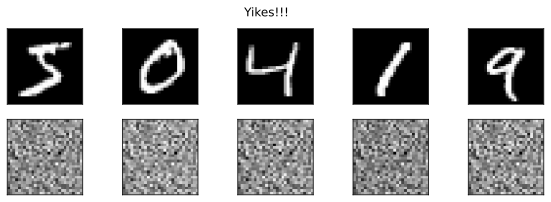

In [15]:
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Yikes!!!')
plt.show()

# Create a function that trains the model

In [ ]:
def function2trainTheModel():

  numepochs = 10000
  
  net,lossfun,optimizer = createTheMNISTAE()

  losses = torch.zeros(numepochs)


  for epochi in range(numepochs):

    randomidx = np.random.choice(train_data.shape[0],size=32)
    X = train_data[randomidx,:]

    yHat = net(X)
    loss = lossfun(yHat,X)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses[epochi] = loss.item()

  return losses,net

# Run the model and show the results!

Final loss: 0.0078


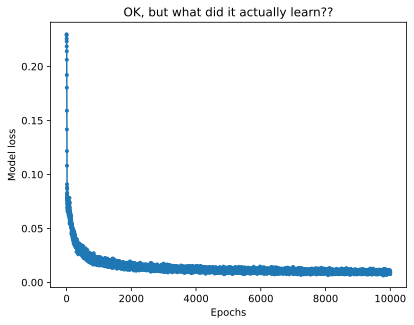

In [17]:
losses,net = function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')

plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn??')
plt.show()

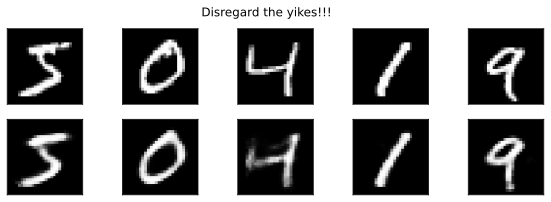

In [18]:
X = train_data[:5,:]
yHat = net(X)


fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Disregard the yikes!!!')
plt.show()

# Add noise to see a use case of an autoencoder

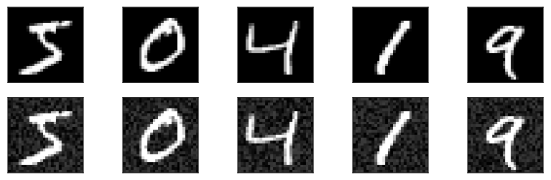

In [ ]:
X = train_data[:10,:]

Xnoise = X + torch.rand_like(X)/4

Xnoise[Xnoise>1] = 1


fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()

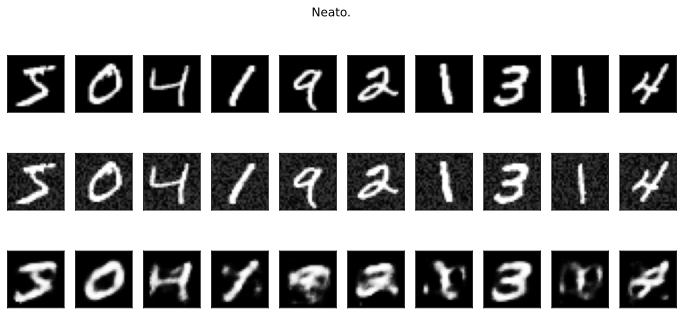

In [ ]:
Y = net(Xnoise)


fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('Neato.')
plt.show()